## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")
# creates panda data frame 

In [3]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286601,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705055,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# for plotting histogram 
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))


## Train-Test Splitting

In [9]:
#for learning purposes
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42) #only generates random indices once and don't change them
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices] #iloc is a special way to retrive data
# this whole function is available in sklearn 
#train_set, test_set = split_train_test(housing,0.2)

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set : {len(train_set)} \nRows in test set : {len(test_set)}")

Rows in train set : 404 
Rows in test set : 102


In [11]:
# However this type of splitting may cause some problem in the future 
# for eg. : CHAS feature has 471 0's and 35 1's 
# It may happen that CHAS has all values=1 in train set and proper training of model will not occur 
# we will use statified sampling on the basis of CHAS

from sklearn.model_selection import StratifiedShuffleSplit

shuffle = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in shuffle.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_set] #pandas.dataframe.loc[index] returns rows with index in series 
    strat_test_set = housing.loc[test_set]

# splits data acc. to CHAS feature value     
    


In [12]:
strat_test_set['CHAS'].value_counts()


0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
95/7

13.571428571428571

In [15]:
376/28

13.428571428571429

In [16]:
#both splits give eual ratio of 0's and 1's

#always do this after splitting
housing = strat_train_set
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280696,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714721,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


## LOOKING FOR CO-RELATIONS

In [17]:
#relation between label i.e. Y and features OF X 
#using pearson corelation value lies b/w -1 to 1
# +1 : high positive corelation (feature with high +ve co relation if increases label also increases and vice versa )
# using pandas.df.corr

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679825
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

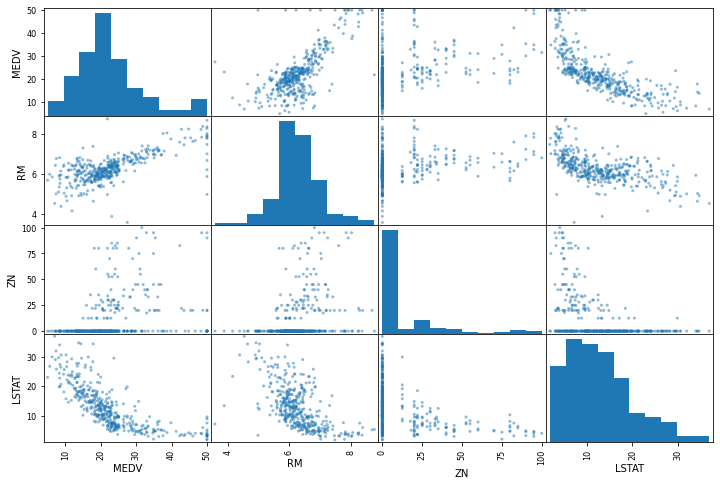

In [20]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize= (12,8))

In [21]:
# insights from above curves : 
# diagnol elements are histogram instead of straight lines for better in sights 
# graph medv vs lstat shows high -ve corr
# grap rm vs medv shows high +ve corr

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

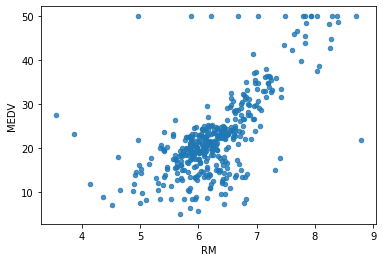

In [22]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8) #alpha =0.8 will show dark color 

In [23]:
# the reason we plotted this is ti see variations or problems in data 
# theres a horizontal cap at y=50 this hows in accuracy in data 
# for eq. too many outlet points (outside maine area of graph) should br removed inOrder to help model train better and so model doesnt get confused by these outlet points
# by graph insights of combined attributes we can even get help to select two attributes as one 

In [24]:
#we can create an attribute of Tax/Room

#ousing["TAXRM"] = housing['TAX']/housing['RM']

In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)


MEDV       1.000000
RM         0.679825
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [26]:
# I have got a good attribute with high -ve corelation
#housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [27]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [28]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


## Missing Attributes


In [29]:
# To take care of missing attributes we have 3 options:
#     1. remove the data points with missing attributes
#     2. remove the whole attribute column which have a null vale
#     3. add a value for null values(0, mean or median)

In [30]:
# option 1 : to be done if only very less rows(data) have null or missing values
housing.dropna(subset=["RM"]).shape
# a.shape #this function returns a new set of data but housing data remains same 
# if writtem like this housing.dropna(subset="RM",inplace = true) orignal data set will not be changed 

(401, 13)

In [31]:
# option2  : to remove the whole attribute column 
housing.drop("RM",axis=1).shape
#RM removed && orignal housind data is still the same 

(404, 12)

In [32]:
#option 3 : add a value for null values 
median = housing['RM'].median()
housing['RM'].fillna(median).shape #fills null with median value
#since inplace =true not written orignal dataset remains same i.e. no change to housing 
#we also need to add this median value to test set as well as new examples given
# sklearn has a class for this : Simple Imputer

(404,)

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# now we need to fit this imputer on our datase
imputer.fit(housing)
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
# sklearn has a class for this : Simple Imputer
X = imputer.transform(housing) # X is a numpy array 
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280163,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712082,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarly three types of objects :
1. Estimators : It estimates some parameter based on dataset.
                eg. Imputer : It has a fit() and tranform method()
                fit() method fits the dataset and calculate internal parameters (eg. median value)
2. Transformers : Tranform method takes input and return output based on the learning(calculated internal parameter) from fit()
                  It also has has a convienence method called fit_transform() which fits and then tranform
                    
3. predictors : eg. Linear Regression Model , fit() & predict() are two common methods
                fit() fits the data set into model & predict() predicts new value 
                also has a score() method to give score of predictions
                takes numpy array as input
pipeline creation && serialisation too provided by scikit                

## Feature Scaling

Primarly two types of scaling methods (produces value in 0 to 1):


    1. Min-Max scaling (Normalisation)
        value = (value - min)/(max - min) (In this method whole value change can change due to change in one value )
    
    
    2. Standardization
        value = (value - mean)/std (In this method variance = 1, If anyOne value changes it won't affect our value change.)

## CREATING A PIPELINE

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# takes constructor parameter as a list 
my_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # .... add as many as you want in your pipeline
    ('std_scaler', StandardScaler())
])

housing_num_tr = my_pipline.fit_transform(housing)

In [36]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor() # how easy it is to change model 
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [38]:
# model trained lets check for few values

In [39]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([22.414, 25.729, 16.355, 23.195, 23.637])

In [41]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluating the model

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [43]:
rmse #overfitting if mse = 0

1.2560935819570371

In [44]:
#high error change the model to decisiontree regressor 

## Using Better evaluation technique -  cross validation 

In [45]:
# K-CV divide train set in K equal groups : to reduce high variance in training (to prevent overfitting)
# for i=0 to k-1 :
#     take ith group as test set and rest of groups as train set to train the model

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
# cross_val_score(model, trainset, labels, scoring, K)
# cost function lower is better but CV requires utility(i.e. higher is better we negate the squared error to do so)
rmse_scores = np.sqrt(-scores)

In [47]:
rmse_scores

array([2.78834788, 2.76526465, 4.39233859, 2.58592473, 3.39580155,
       2.62250101, 5.00867284, 3.33048259, 3.0930191 , 3.15440039])

In [48]:
# very less errors and overfitting removed 
def print_scores(scores):
    print("Score : ", scores)
    print("Mean : ", scores.mean())
    print("Std : ", scores.std())


In [49]:
print_scores(rmse_scores)

Score :  [2.78834788 2.76526465 4.39233859 2.58592473 3.39580155 2.62250101
 5.00867284 3.33048259 3.0930191  3.15440039]
Mean :  3.313675333508825
Std :  0.7550948237239367


## Saving the Model 

In [50]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Model Testing

In [56]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipline.fit_transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [57]:
final_rmse

3.446830853316209

In [58]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2420743 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])